In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Net Surface short wave flux.csv', skiprows = 12)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8640 non-null   object 
 1   Net Surface short wave flux (W m-2)(01)  8640 non-null   float64
 2   Net Surface short wave flux (W m-2)(02)  8640 non-null   float64
 3   Net Surface short wave flux (W m-2)(03)  8640 non-null   float64
 4   Net Surface short wave flux (W m-2)(04)  8640 non-null   float64
 5   Net Surface short wave flux (W m-2)(05)  8640 non-null   float64
 6   Net Surface short wave flux (W m-2)(06)  8640 non-null   float64
 7   Net Surface short wave flux (W m-2)(07)  8640 non-null   float64
 8   Net Surface short wave flux (W m-2)(08)  8640 non-null   float64
 9   Net Surface short wave flux (W m-2)(09)  8640 non-null   float64
 10  Net Surface short wave flux (W m-2)(10)  8640 no

In [3]:
df.rename(columns = {df.columns[0]: 'Date'}, inplace = True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['flux_mean'] = df.iloc[:, 1:].mean(axis = 1)

In [4]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [9]:
annual_flux = df.groupby("Year").agg(
    flux_annual_mean=("flux_mean", "mean"),
    flux_summer_mean=("flux_mean", lambda x: x[df.loc[x.index, "Month"].isin([6, 7, 8])].mean())
).loc[2013:2035]

In [11]:
annual_flux

,flux_annual_mean,flux_summer_mean
Year,,
2013.0,99.074939,178.946686
2014.0,101.710508,188.854149
2015.0,100.909473,187.380131
2016.0,100.679108,186.027615
2017.0,100.688694,186.524854
2018.0,102.587729,189.188710
2019.0,101.666382,188.089906
2020.0,102.498553,192.142825
2021.0,102.183538,188.846773


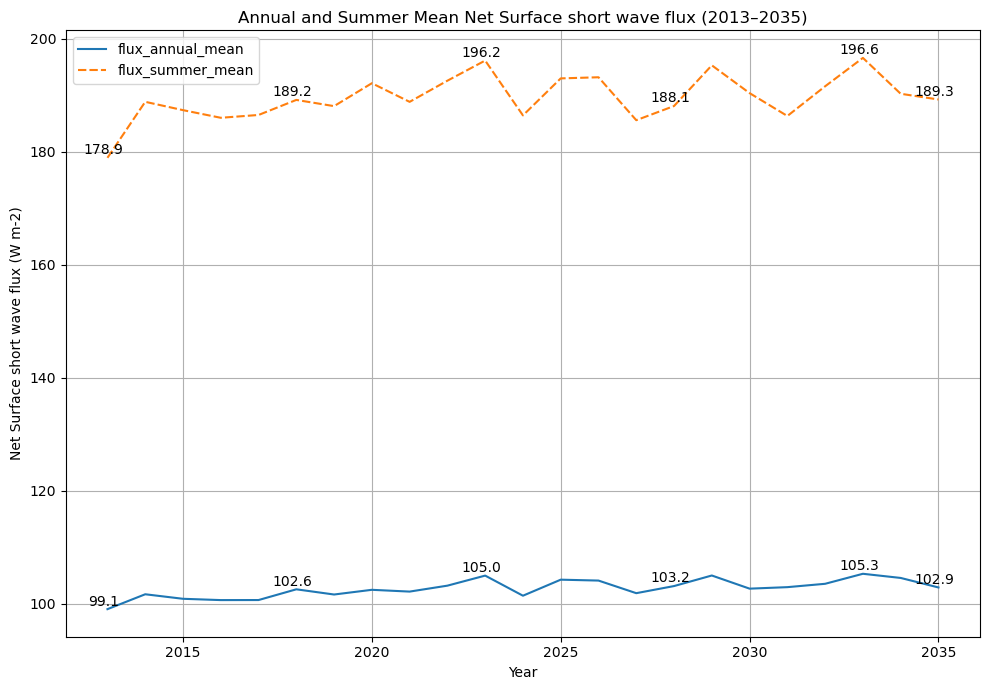

In [15]:
plt.figure(figsize=(10, 7))
number = sns.lineplot(data=annual_flux[["flux_annual_mean", "flux_summer_mean"]])

years = {annual_flux.index.min(), annual_flux.index.max()}
years.update(y for y in annual_flux.index if (y - annual_flux.index.min()) % 5 == 0) #每5年

for col in ["flux_annual_mean", "flux_summer_mean"]:
    for x, y in zip(annual_flux.index, annual_flux[col]):
        if x in years:
            number.text(x-0.1, y+0.1, f"{y:.1f}", ha='center', va='bottom', fontsize=10)

plt.ylabel("Net Surface short wave flux (W m-2)")
plt.title("Annual and Summer Mean Net Surface short wave flux (2013–2035)")
plt.grid(True)

plt.tight_layout()
plt.show()